In [1]:
#30DayMapChallenge Day 3: Polygons
#Voronoi plot of player positions on the sole goal of the July 2018 match between OL Reign and Utah Royals, scored by Megan Rapinoe
#Python #Jupyter #dataviz #BoldTogether
#Data Source: @StatsBomb
#Code Basis: @mckayjohns
#pip install mplsoccer

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.ops import unary_union, cascaded_union
from mplsoccer.pitch import Pitch 

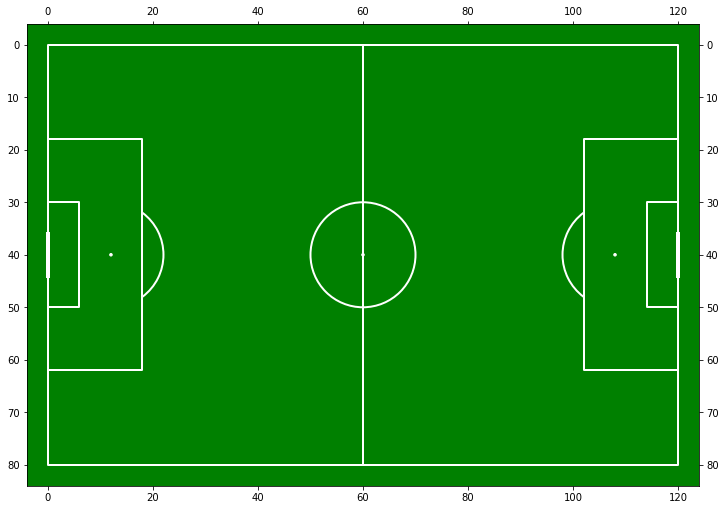

In [3]:
#Drawing a soccer pitch using mplsoccer package
fig, ax = plt.subplots(figsize = (13,8.5))

pitch = Pitch(pitch_type ="statsbomb", #orientation = "horizontal",
              pitch_color ="green",line_color="white",#constrained_layout = False, view = 'half',
              axis =True, label = True, tick=True)
pitch.draw(ax=ax)

In [4]:
dforig = pd.read_json('7480.json')

In [5]:
#Setting up and cleaning dataset
df = dforig
df = df.fillna(0)
df = df.loc[df.location != 0]
df = df.drop(columns=['id','tactics', 'related_events', 'counterpress', 'under_pressure',
       'ball_recovery', 'goalkeeper', 'duel', 'dribble',
       'foul_committed', 'interception', 'block', 'foul_won',
       'substitution']).reset_index()
df['x'] = df['location']
df['y'] = df['location']
for i in range(len(df)):
    df['x'][i] = df.location[i][0]
    df['y'][i] = df.location[i][1]

C:\Users\matan\AppData\Local\Temp/ipykernel_42432/1382830064.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'][i] = df.location[i][0]
C:\Users\matan\AppData\Local\Temp/ipykernel_42432/1382830064.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][i] = df.location[i][1]


In [6]:
shots = df.loc[df.type == {'id': 16, 'name': 'Shot'} ]
shots = shots.drop(columns=["index"]).reset_index()
shots = shots.drop(columns=["index"]).reset_index()
locX = []
locY = []
oppX = []
oppY = []
a=0
#Setting up the shots dataset with readable location data
for j in range(len(shots)):
    if (a !=1):
        if (shots.loc[j].shot["outcome"] == {'id': 97, 'name': 'Goal'}):
            print(shots.loc[j])
            a=1
            for i in range(len(shots.loc[j]["shot"]["freeze_frame"])):
                if (shots.loc[j]["shot"]["freeze_frame"][i]["teammate"] == True):
                    print(shots.loc[j]["shot"]["freeze_frame"][i])
                    locX.append(shots.loc[j]["shot"]["freeze_frame"][i]["location"][0])
                    locY.append(shots.loc[j]["shot"]["freeze_frame"][i]["location"][1])
                else:
                    oppX.append(shots.loc[j]["shot"]["freeze_frame"][i]["location"][0])
                    oppY.append(shots.loc[j]["shot"]["freeze_frame"][i]["location"][1])

index                                                             10
level_0                                                         1793
period                                                             2
timestamp                                 2022-12-13 00:08:15.726000
minute                                                            53
second                                                            15
type                                      {'id': 16, 'name': 'Shot'}
possession                                                       119
possession_team                      {'id': 760, 'name': 'OL Reign'}
play_pattern                        {'id': 2, 'name': 'From Corner'}
team                                 {'id': 760, 'name': 'OL Reign'}
duration                                                       1.345
player                    {'id': 8298, 'name': 'Megan Anna Rapinoe'}
position                             {'id': 21, 'name': 'Left Wing'}
location                          

In [7]:
#print(shots.loc[0]["shot"]["freeze_frame"])

In [8]:
gov = list(np.zeros((6,),dtype=int))
opp = list(np.ones((10,),dtype=int))
fin = pd.DataFrame({
    'x':locX + oppX,
    'y':locY + oppY,
    'team': gov + opp
})

In [9]:
fin

,x,y,team
0,108.0,26.0,0
1,114.0,47.0,0
2,113.0,44.0,0
3,116.0,44.0,0
4,117.0,41.0,0
5,117.0,39.0,0
6,118.0,42.0,1
7,114.0,41.0,1
8,117.0,45.0,1
9,118.0,32.0,1


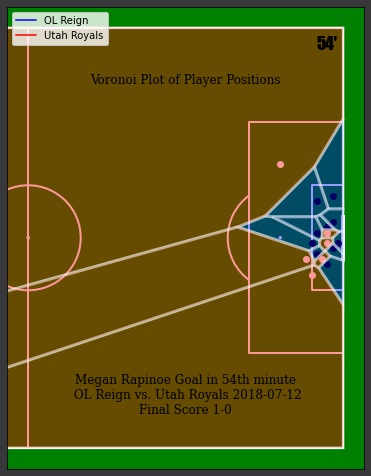

In [10]:
#Setting up and plotting a voronoi plot of locations at the point of a shot
fig,ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor("#38383b")
ax.patch.set_facecolor("#38383b")
pitch = Pitch(pitch_type ="statsbomb", #orientation = "horizontal",
              pitch_color ="green",line_color="white",#constrained_layout = False, view = 'half',
              axis =True, half = True)#, label = True, tick=True)
pitch.draw(ax=ax)
x=fin.x
y=fin.y
pitch.scatter(locX, locY, ax=ax, color="white")
pitch.scatter(oppX, oppY, ax=ax, color="black")
pitch.annotate(text='Megan Rapinoe Goal in 54th minute\n OL Reign vs. Utah Royals 2018-07-12\nFinal Score 1-0',
               xytext=(90, 70), xy=(60, 40), ha='center', va='center',
               ax=ax, fontfamily = 'serif', fontsize = 'large')
pitch.annotate(text='Voronoi Plot of Player Positions',
               xytext=(90, 10), xy=(60, 40), ha='center', va='center',
               ax=ax, fontfamily = 'serif', fontsize = 'large')
pitch.annotate(text="54'",
               xytext=(117, 3), xy=(60, 40), ha='center', va='center',
               ax=ax, fontfamily = 'fantasy', fontsize = 'xx-large')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='b', label='OL Reign'),
                   Line2D([0], [0], color='r', label='Utah Royals')]
ax.legend(handles=legend_elements, loc='upper left', labelcolor ="black")
team1, team2 =pitch.voronoi(x,y,fin.team)
t1 = pitch.polygon(team1,ax=ax,fc='blue',ec='white',lw=3,alpha=.4)
t2 = pitch.polygon(team2,ax=ax,fc='red',ec='white',lw=3,alpha=.4)